In [2]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from geneticalgorithm import geneticalgorithm as ga
import warnings

In [1]:
!pip install geneticalgorithm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15077 sha256=839dc72d62af00d8a82e7dc086095b6949b97ba6c5be35ea95e2d439f285c373
  Stored in directory: /root/.cache/pip/wheels/07/e6/86/f23164d12c3134966614102db8e7956ab359faf7ffd78703ce
Successfully built func-timeout


In [3]:
# Define functions for genetic algorithm fitness evaluation and neural network training
def fitness_function(params):
    # Decode parameters
    hidden_layer_sizes = (int(params[0]),) * int(params[1])
    activation = ['identity', 'logistic', 'tanh', 'relu'][int(params[2])]
    solver = ['lbfgs', 'sgd', 'adam'][int(params[3])]

    # Create and train neural network
    model = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, activation=activation, solver=solver)
    model.fit(X_train, y_train)

    # Evaluate fitness (example: mean squared error)
    fitness = -model.score(X_val, y_val)

    return fitness

In [4]:
def train_neural_network(params):
    # Decode parameters
    hidden_layer_sizes = (int(params[0]),) * int(params[1])
    activation = ['identity', 'logistic', 'tanh', 'relu'][int(params[2])]
    solver = ['lbfgs', 'sgd', 'adam'][int(params[3])]

    # Create and train neural network
    model = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, activation=activation, solver=solver)
    model.fit(X_train, y_train)

    # Evaluate neural network performance on validation data
    validation_error = -model.score(X_val, y_val)

    return validation_error

In [5]:
# Load your dataset
np.random.seed(42)

# Assuming you have features like temperature, humidity, etc., and you want to predict drying time
num_samples = 1000
num_features = 5  # Adjust based on your actual features

# Generate synthetic features
X = np.random.rand(num_samples, num_features)

In [6]:
# Generate synthetic target variable (drying time)
# Here, we'll assume a linear relationship with some noise
true_coefficients = np.random.rand(num_features) * 10  # Random coefficients for features
noise = np.random.normal(loc=0, scale=1, size=num_samples)  # Gaussian noise
y = np.dot(X, true_coefficients) + noise

In [7]:
# Example: Replace X_train, X_val, y_train, y_val with your dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

warnings.filterwarnings("ignore")

 The best solution found:
 [34.  2.  3.  1.]

 Objective function:
 -0.9542854848199847


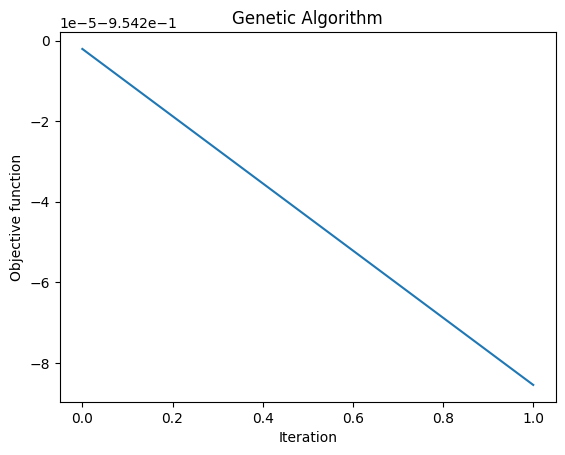

In [8]:
# Define genetic algorithm parameters
number_of_parameters = 4  # Adjust based on the number of parameters you want to optimize
varbound = np.array([[5, 50],  # Range for number of neurons in each hidden layer
                     [1, 5],    # Range for number of hidden layers
                     [0, 3],    # Activation function: 0 for identity, 1 for logistic, 2 for tanh, 3 for relu
                     [0, 2]])   # Solver: 0 for lbfgs, 1 for sgd, 2 for adam
algorithm_param = {'max_num_iteration': 1, 'population_size': 100, 'mutation_probability': 0.1,
                   'elit_ratio': 0.01, 'crossover_probability': 0.5, 'parents_portion': 0.3,
                   'crossover_type': 'uniform', 'max_iteration_without_improv': None}
model = ga(function=fitness_function, dimension=number_of_parameters, variable_type='int', variable_boundaries=varbound,
           algorithm_parameters=algorithm_param)

# Run the genetic algorithm
model.run()

In [9]:
# Get the best parameters found by the genetic algorithm
best_params = model.output_dict['variable']

# Train neural network with the best parameters
validation_error = train_neural_network(best_params)

In [10]:
print("Best parameters found by genetic algorithm:", best_params)
print("Validation error of neural network:", validation_error)

Best parameters found by genetic algorithm: [34.  2.  3.  1.]
Validation error of neural network: -0.9532617645775645
